In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.read_csv('CrabAgePrediction.csv')
dp = data[data['Sex']=='I'].index
df = data.drop(dp)
df_M = data[data['Sex']=='M']
df_F = data[data['Sex']=='F']
sex = df

數據

In [2]:
sex_describe = sex.describe()
sex_describe.loc['c.v.'] = ((sex_describe.loc['std']**2/sex_describe.loc['mean'])*100)
sex_describe.loc['skew'] = (sex.skew())
sex_describe.loc['kurt'] = (sex.kurt())
sex_describe

C:\Users\allen\AppData\Local\Temp\ipykernel_1092\1735825930.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sex_describe.loc['skew'] = (sex.skew())
C:\Users\allen\AppData\Local\Temp\ipykernel_1092\1735825930.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sex_describe.loc['kurt'] = (sex.kurt())


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1.423943,1.116198,0.386114,28.817475,12.421792,6.307034,8.260565,10.915038
std,0.239300,0.196878,0.094031,12.821337,5.989869,2.880555,3.642927,3.058831
min,0.387500,0.275000,0.037500,0.439417,0.184272,0.085048,0.141747,3.000000
25%,1.287500,1.000000,0.337500,19.855281,8.093782,4.323299,5.808104,9.000000
50%,1.462500,1.150000,0.387500,28.462898,12.232809,6.166016,8.079607,10.000000
75%,1.587500,1.250000,0.437500,36.560224,16.063535,8.136306,10.347568,12.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000
c.v.,4.021560,3.472575,2.289979,570.440994,288.835383,131.560992,160.653859,85.720724
skew,-0.822252,-0.820501,6.679963,0.370587,0.584146,0.435282,0.554455,1.361192


性別圓餅圖

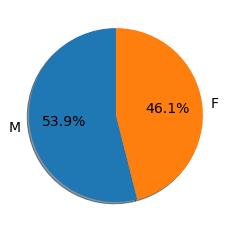

In [3]:
plt.pie([len(df_M.index),len(df_F.index)],
        labels=['M','F'],
        autopct = "%1.1f%%",
        textprops = {"fontsize" : 14},
        startangle = 90,
        shadow=True)
plt.show()

綜合盒鬚圖

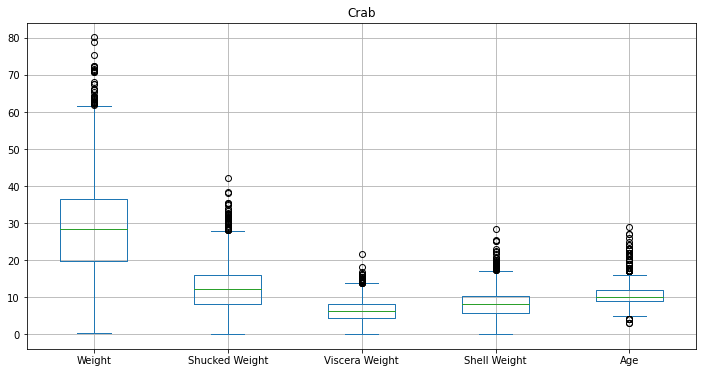

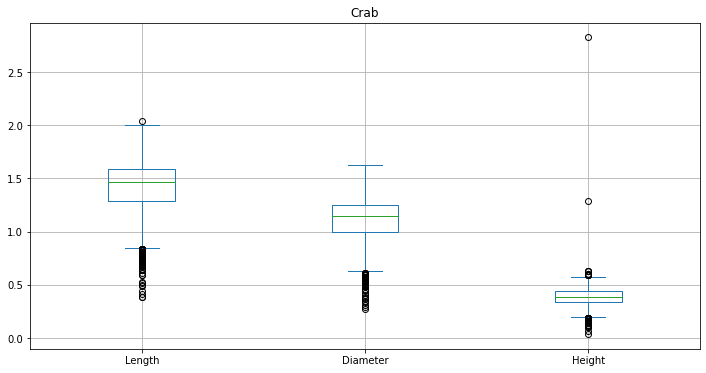

In [4]:
df.iloc[:,4:9].plot.box(title="Crab", figsize=(12,6), grid=True)
df.iloc[:,1:4].plot.box(title="Crab", figsize=(12,6), grid=True)
plt.show()

數值位於範圍外1.5×IQR到3×IQR範圍的數值，稱作適度離群值（mild outlier）。   
數值位於範圍外3×IQR以上的數值，稱作極端離群值（extreme outlier）

In [29]:
IQR = sex.quantile(0.75)-sex.quantile(0.25)
# mild_outlier = sex[((sex.quantile(0.75)+1.5*IQR < sex) & (sex < sex.quantile(0.75)+3*IQR))
#                     | ((sex.quantile(0.25)-1.5*IQR > sex) & (sex > sex.quantile(0.25)-3*IQR))]
extreme_outlier = sex[(sex > sex.quantile(0.75)+3*IQR)|(sex < sex.quantile(0.25)-3*IQR)]

C:\Users\allen\AppData\Local\Temp\ipykernel_11040\2887850038.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  extreme_outlier = sex[(sex > sex.quantile(0.75)+3*IQR)|(sex < sex.quantile(0.25)-3*IQR)]


散布圖矩陣

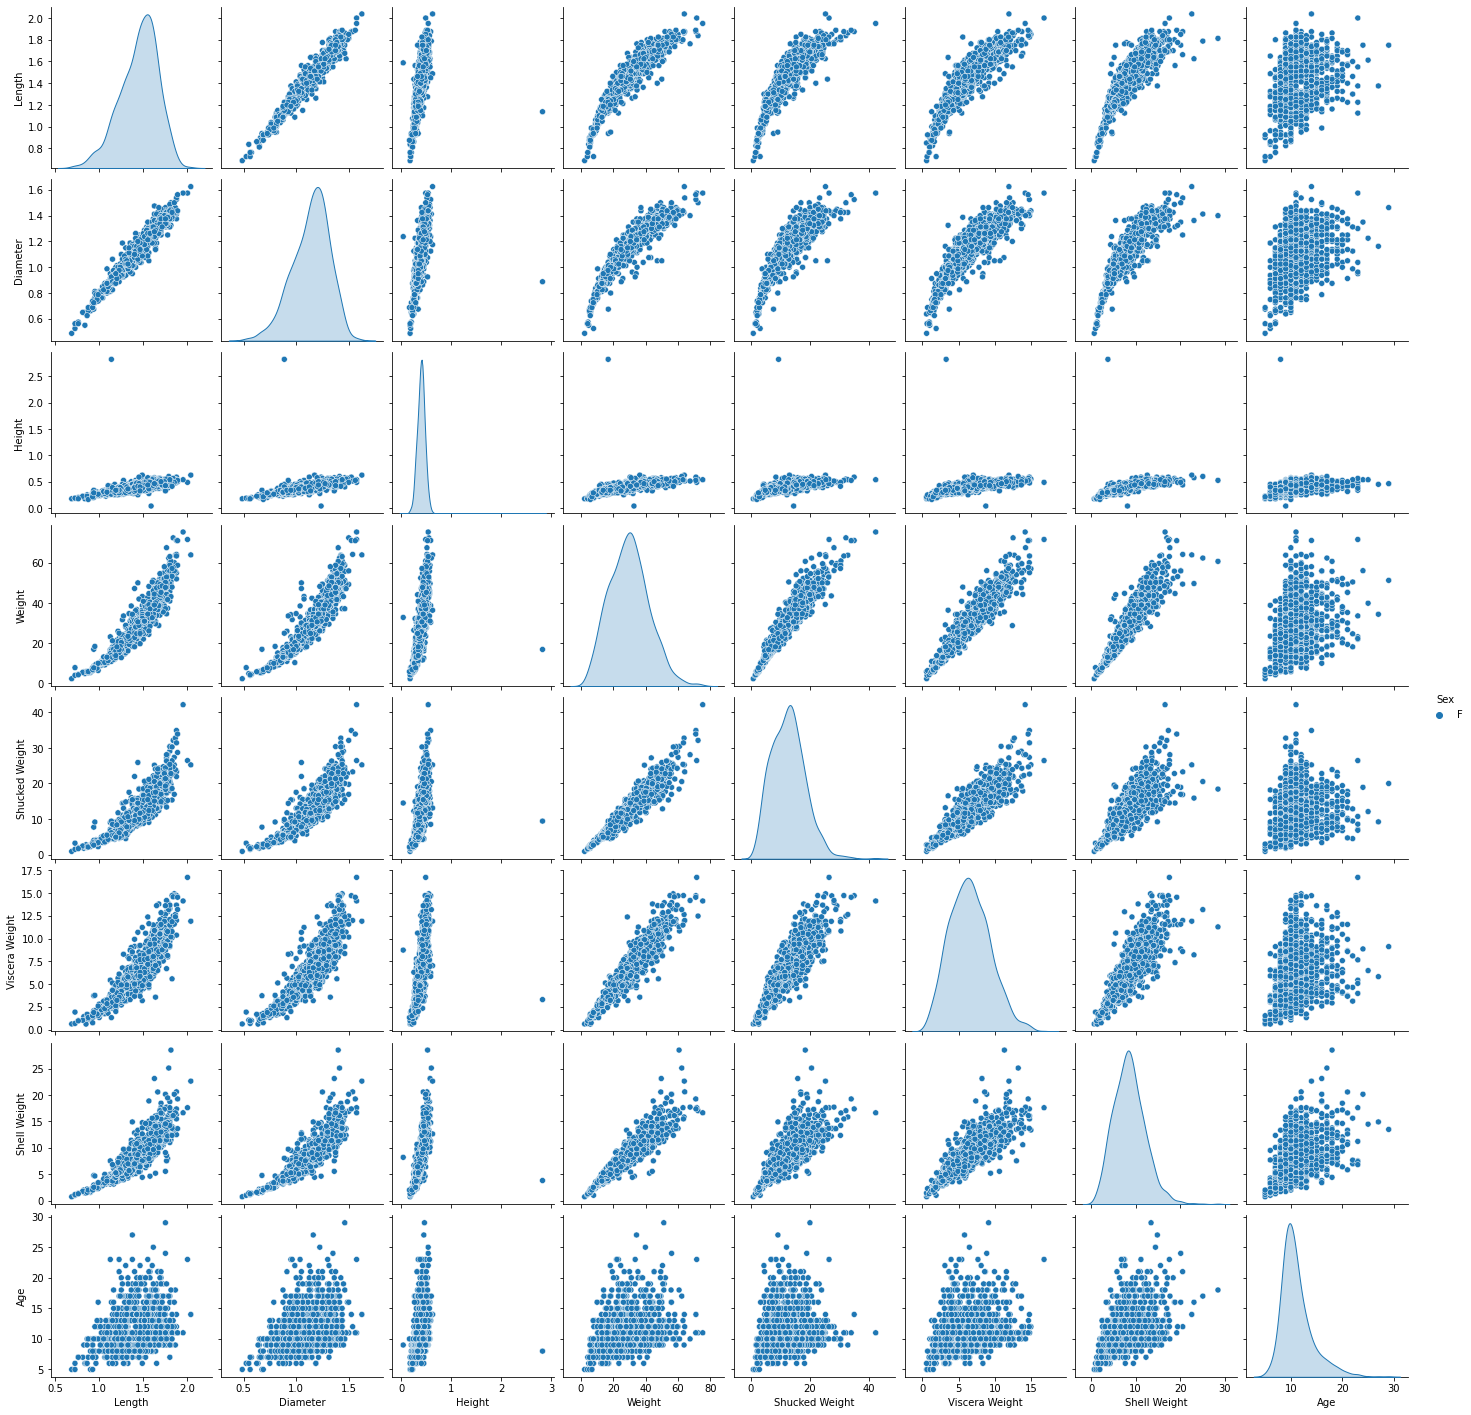

In [5]:
sex = df_F
sns.pairplot(sex, hue="Sex")

相關係數

In [6]:
sex.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.970666,0.547183,0.928044,0.891129,0.890572,0.864097,0.220119
Diameter,0.970666,1.000000,0.556672,0.924579,0.877581,0.877084,0.876111,0.257802
Height,0.547183,0.556672,1.000000,0.577999,0.526679,0.545148,0.575979,0.224023
Weight,0.928044,0.924579,0.577999,1.000000,0.949434,0.938779,0.923763,0.257439
Shucked Weight,0.891129,0.877581,0.526679,0.949434,1.000000,0.889137,0.802338,0.085219
Viscera Weight,0.890572,0.877084,0.545148,0.938779,0.889137,1.000000,0.838110,0.201796
Shell Weight,0.864097,0.876111,0.575979,0.923763,0.802338,0.838110,1.000000,0.394924
Age,0.220119,0.257802,0.224023,0.257439,0.085219,0.201796,0.394924,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 1, 'Length'),
  Text(1.5, 1, 'Diameter'),
  Text(2.5, 1, 'Height'),
  Text(3.5, 1, 'Weight'),
  Text(4.5, 1, 'Shucked Weight'),
  Text(5.5, 1, 'Viscera Weight'),
  Text(6.5, 1, 'Shell Weight'),
  Text(7.5, 1, 'Age')])

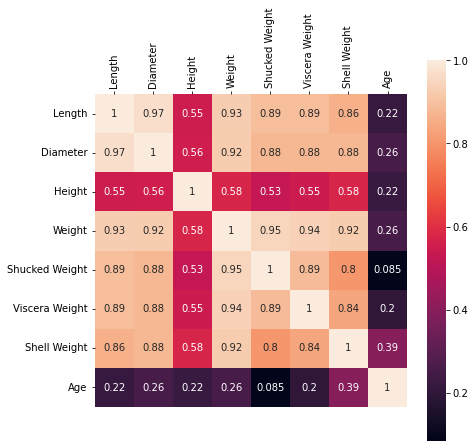

In [7]:
plt.figure(figsize=(7, 7))
sns.heatmap(sex.corr(), annot=True, square=True);
plt.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.xticks(rotation=90)
# plt.show()

VIF

In [8]:
vif = pd.DataFrame()
vif['variable'] = sex.iloc[:,1:9].columns
vif["VIF"] = [variance_inflation_factor(sex.iloc[:,1:9], i) for i in range(len(sex.iloc[:,1:9].columns))]
vif

,variable,VIF
0,Length,756.800010
1,Diameter,803.223621
2,Height,23.927664
3,Weight,445.116978
4,Shucked Weight,124.775509
5,Viscera Weight,63.615791
6,Shell Weight,85.771919
7,Age,20.298866


## 以性別區分

盒鬚圖

重量

<Figure size 432x288 with 0 Axes>

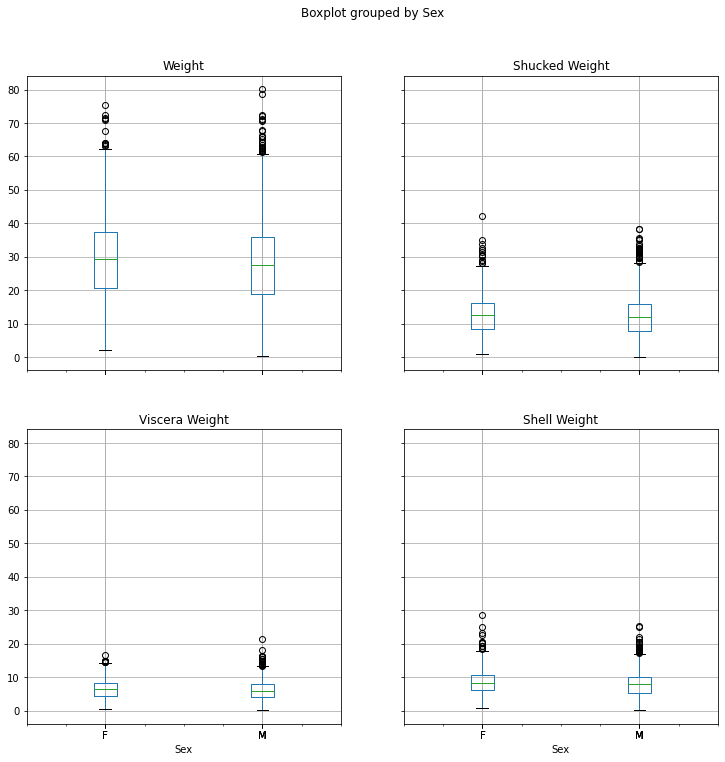

In [9]:
plt.figure()
df.boxplot(column=["Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"], by="Sex", figsize=(12, 12))
plt.show()

長度

<Figure size 1224x1224 with 0 Axes>

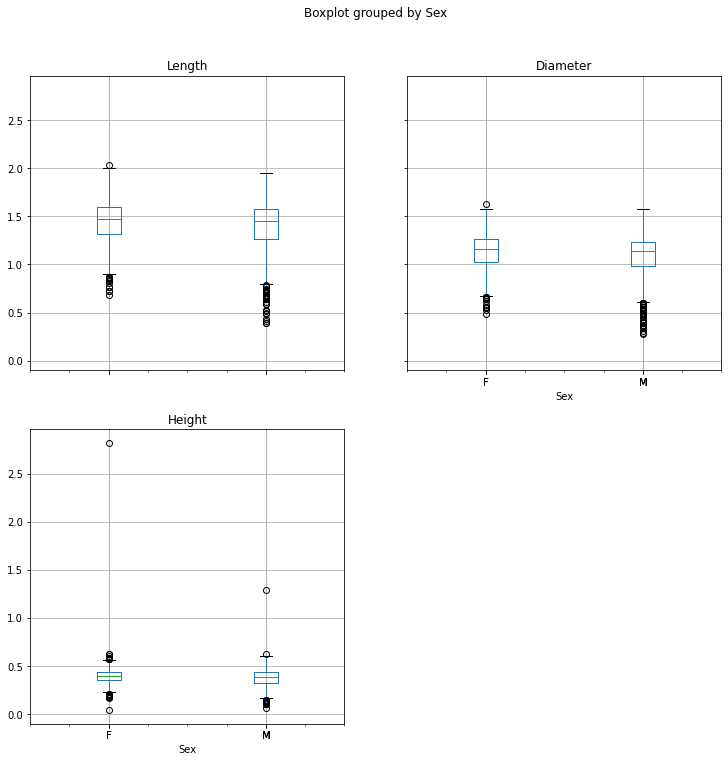

In [10]:
plt.figure(figsize=(17, 17))
df.boxplot(column=['Length', 'Diameter', 'Height'], by="Sex", figsize=(12, 12), )
plt.show()

<Figure size 432x288 with 0 Axes>

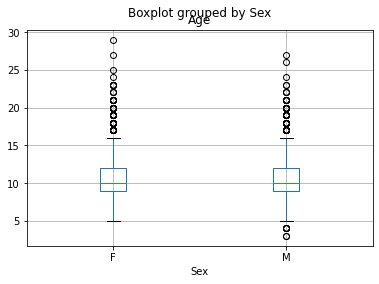

In [11]:
plt.figure()
df.boxplot(column="Age", by="Sex")
plt.show()